In [2]:
import numpy as np
import pandas as pd

# df = yfinance.download('AAPL','2000-1-1','2020-1-1')
# df = df.drop(['Volume'],1).drop(['Adj Close'],1)

[*********************100%***********************]  1 of 1 completed


In [88]:
import yfinance
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mandates
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib.font_manager as fm

plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# 삼성전자 주식 데이터
df = yfinance.download('005930.KS','2010-1-1','2021-1-1')

[*********************100%***********************]  1 of 1 completed


In [6]:
# 데이터 확인
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2713 entries, 2010-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2713 non-null   float64
 1   High       2713 non-null   float64
 2   Low        2713 non-null   float64
 3   Close      2713 non-null   float64
 4   Adj Close  2713 non-null   float64
 5   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 148.4 KB
None
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2010-01-04  16060.0  16180.0  16000.0  16180.0  13014.251953  11950800
2010-01-05  16520.0  16580.0  16300.0  16440.0  13223.383789  27925850
2010-01-06  16580.0  16820.0  16520.0  16820.0  13529.032227  22948850
2010-01-07  16820.0  16820.0  16260.0  16

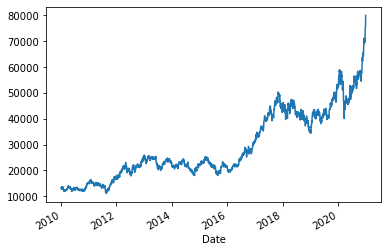

In [7]:
df['Adj Close'].plot();

In [376]:
# 데이터 가져오기
data = pd.read_csv('data/project_data2.csv', index_col='Date')[:-2]
print(data.info())
print()
print(data.head(3))
print()
print(data.tail(3))
# print(data.tail())

features = ['Open','High','Low','Volume','Dividends','Dollar','S&P500','DJIA','Nasdaq','interest']
# ['Open', 'High', 'Low', 'Volume','Dollar','S&P500', 'DJIA', 'Nasdaq', 'interest','SamSung_close']

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])
y = data['Target']
# X, means, y = scaling(data, ['SamSung_close'])
# X = X[:len(y)]
print(data_scaled.shape)
print(y.value_counts())
print()

# Split
day = 10
X_train, X_test = data_scaled[:-day,:], data_scaled[-day:,:]
y_train, y_test = y[:-day], y[-day:]
print(X_train.shape)
print(y_train.shape)
print()
print('test set value count')
print(y_test.value_counts())
print(y_train.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 2020-01-02 to 2021-12-10
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           482 non-null    float64
 1   High           482 non-null    float64
 2   Low            482 non-null    float64
 3   Adj Close      482 non-null    float64
 4   Volume         482 non-null    float64
 5   Dividends      482 non-null    int64  
 6   Change         482 non-null    float64
 7   Dollar         482 non-null    float64
 8   Dollar_rate    482 non-null    float64
 9   S&P500         482 non-null    float64
 10  DJIA           482 non-null    float64
 11  Nasdaq         482 non-null    float64
 12  interest       482 non-null    float64
 13  SamSung_close  482 non-null    int64  
 14  Target         482 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 60.2+ KB
None

               Open     High      Low    Adj Close      Volume  Dividends  \


              precision    recall  f1-score   support

           1       0.53      0.58      0.55       225
           2       0.54      0.55      0.54       222
           3       0.00      0.00      0.00        25

    accuracy                           0.53       472
   macro avg       0.36      0.38      0.37       472
weighted avg       0.51      0.53      0.52       472

0.5338983050847458
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.30      1.00      0.46         3
           3       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.10      0.33      0.15        10
weighted avg       0.09      0.30      0.14        10

0.3


C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TFG5076XG\anaconda3\lib\site-packa

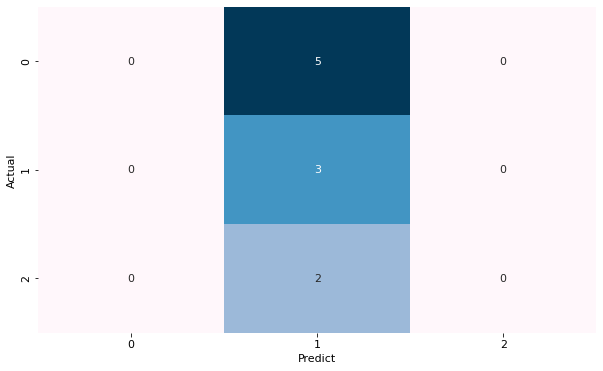

In [377]:
# logistic regression model fitting
model_lgr = LogisticRegression(max_iter=1000)
model_lgr.fit(X_train, y_train)
print(classification_report(y_train, model_lgr.predict(X_train)))
print(model_lgr.score(X_train, y_train))
print(classification_report(y_test, model_lgr.predict(X_test)))
print(model_lgr.score(X_test, y_test))

# confusion 시각화
plt.figure()
sns.heatmap(
    confusion_matrix(y_test, model_lgr.predict(X_test)),
    annot=True,
    cmap='PuBu',
    cbar=False
)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

[1 1 1 1 2 1 1 2 1 1]
[3 2 1 1 2 1 1 3 1 2]
0.7330508474576272
0.6
              precision    recall  f1-score   support

           1       0.62      1.00      0.77         5
           2       0.50      0.33      0.40         3
           3       0.00      0.00      0.00         2

    accuracy                           0.60        10
   macro avg       0.38      0.44      0.39        10
weighted avg       0.46      0.60      0.50        10



C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


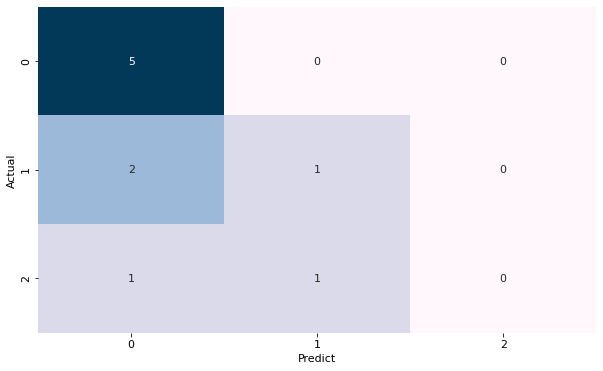

In [378]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#  KNeighbors()
model_kn = KNeighborsClassifier(n_neighbors=3)
model_kn.fit(X_train, y_train)

print(model_kn.predict(X_test))
print(y_test.values)
print(model_kn.score(X_train, y_train))
print(model_kn.score(X_test, y_test))
print(classification_report(y_test, model_kn.predict(X_test)))

# confusion 시각화
plt.figure()
sns.heatmap(
    confusion_matrix(y_test, model_kn.predict(X_test)),
    annot=True,
    cmap='PuBu',
    cbar=False
)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

[2 2 1 1 1 2 1 1 1 1]
[3 2 1 1 2 1 1 3 1 2]
1.0
0.5
              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         2

    accuracy                           0.50        10
   macro avg       0.30      0.38      0.33        10
weighted avg       0.39      0.50      0.43        10



C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


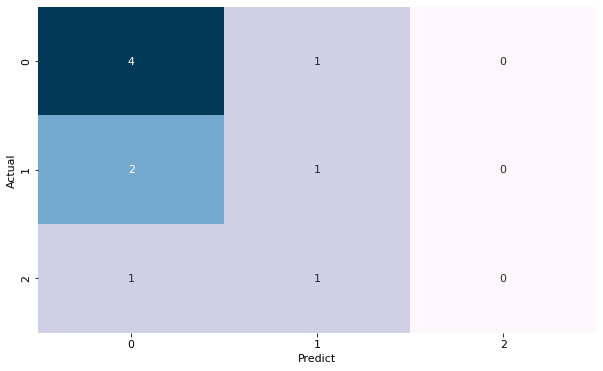

In [379]:
#  DecisionTreeClassifier()
model_dt = DecisionTreeClassifier(random_state=11)
model_dt.fit(X_train, y_train)

print(model_dt.predict(X_test))
print(y_test.values)
print(model_dt.score(X_train, y_train))
print(model_dt.score(X_test, y_test))
# print(y_test)
# print(model_dt.predict(X_test))
print(classification_report(y_test, model_dt.predict(X_test)))

# confusion 시각화
plt.figure()
sns.heatmap(
    confusion_matrix(y_test, model_dt.predict(X_test)),
    annot=True,
    cmap='PuBu',
    cbar=False
)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

[-0.75337823  0.56538483  0.17960918  0.17967221 -0.39050954  0.3321116
 -0.08013498  0.23986585 -0.06799334 -0.16824243]
['Open', 'High', 'Low', 'Volume', 'Dividends', 'Dollar', 'S&P500', 'DJIA', 'Nasdaq', 'interest']
Feature: 0, Score: -0.7534
Feature: 1, Score: 0.5654
Feature: 2, Score: 0.1796
Feature: 3, Score: 0.1797
Feature: 4, Score: -0.3905
Feature: 5, Score: 0.3321
Feature: 6, Score: -0.0801
Feature: 7, Score: 0.2399
Feature: 8, Score: -0.0680
Feature: 9, Score: -0.1682


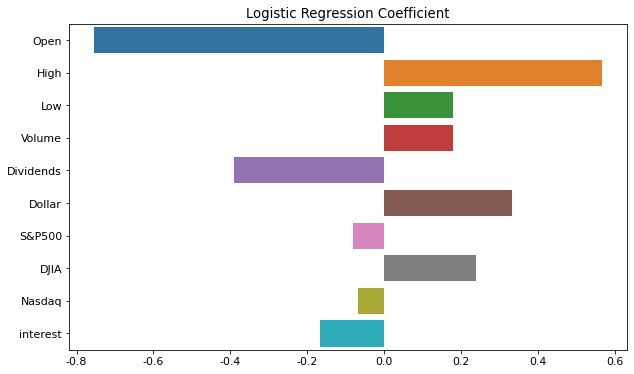

Feature: 0, Score: 0.0985
Feature: 1, Score: 0.0965
Feature: 2, Score: 0.0931
Feature: 3, Score: 0.1513
Feature: 4, Score: 0.0000
Feature: 5, Score: 0.1648
Feature: 6, Score: 0.1070
Feature: 7, Score: 0.0566
Feature: 8, Score: 0.0779
Feature: 9, Score: 0.1543


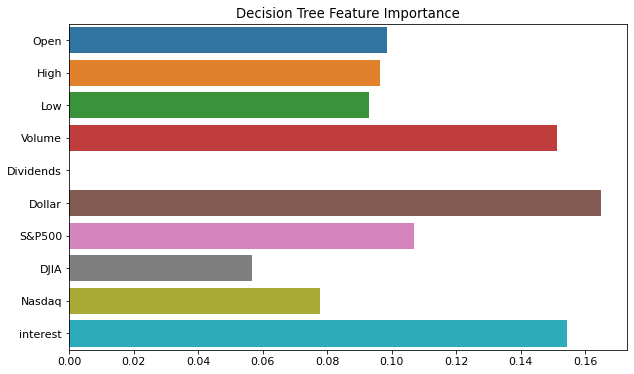

In [393]:
# edit

# feature importance
import math
# get importance
print(model_lgr.coef_[0])
print(features)
importance = model_lgr.coef_[0] # pow(math.e, model_lgr.coef_[0])
# print()
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.4f' % (i,v))
# plot feature importance
sns.barplot(x=importance, y=features)
# plt.barh(features, pow(math.e, importance))
plt.title('Logistic Regression Coefficient')
plt.savefig('lgr_coef.png')
plt.show()

# get importance
importance = model_dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.4f' % (i,v))
# plot feature importance
sns.barplot(x=importance, y=features)
# plt.barh(features, importance)
plt.title('Decision Tree Feature Importance')
plt.savefig('dt_feature_importance.png')
plt.show()

[0.46951526 1.76097943 1.19628128 1.19485994 1.39941862 0.92490782
 1.2774563  0.93209499 0.84549505]
Feature: 0, Score: -0.75605
Feature: 1, Score: 0.56587
Feature: 2, Score: 0.17922
Feature: 3, Score: 0.17803
Feature: 4, Score: 0.33606
Feature: 5, Score: -0.07806
Feature: 6, Score: 0.24487
Feature: 7, Score: -0.07032
Feature: 8, Score: -0.16783


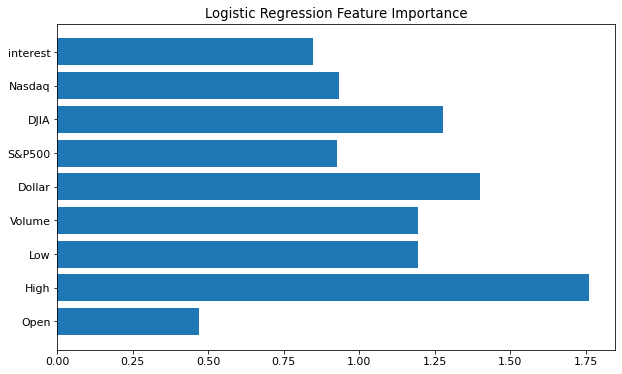

Feature: 0, Score: 0.09462
Feature: 1, Score: 0.09635
Feature: 2, Score: 0.09823
Feature: 3, Score: 0.14598
Feature: 4, Score: 0.17019
Feature: 5, Score: 0.10615
Feature: 6, Score: 0.06849
Feature: 7, Score: 0.05311
Feature: 8, Score: 0.16688


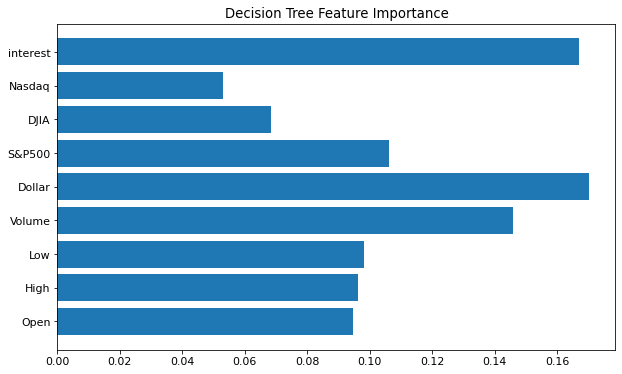

In [342]:
# feature importance
import math
# get importance
importance = model_lgr.coef_[0]
print(pow(math.e, importance))
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(features, pow(math.e, importance))
plt.title('Logistic Regression Feature Importance')
plt.show()

# # get importance
# importance = model_kn.effective_metric_params_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar(features, importance)
# plt.title('knn')
# plt.show()

# get importance
importance = model_dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(features, importance)
plt.title('Decision Tree Feature Importance')
plt.show()

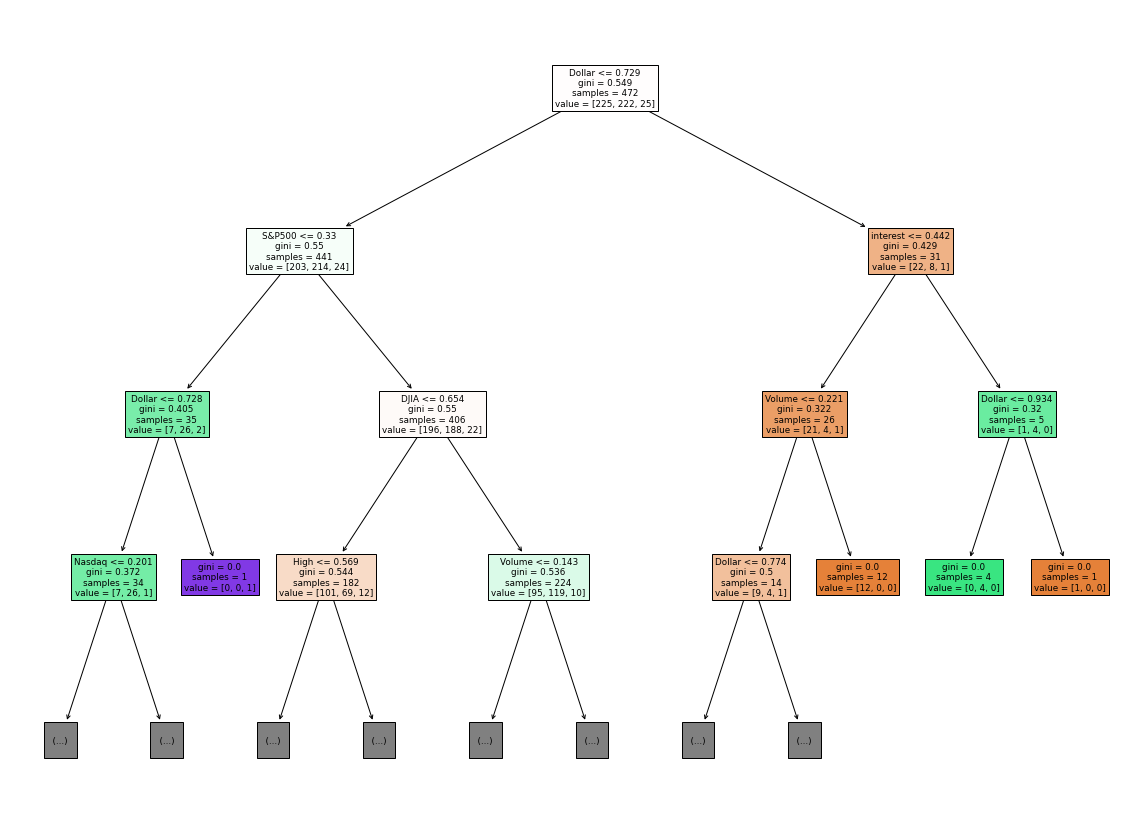

In [343]:
from sklearn.tree import plot_tree    # 시각화

plt.figure(figsize=(20,15))
plot_tree(model_dt, max_depth=11, min_sam,filled=True, feature_names=features)
plt.show()

Fitting 5 folds for each of 110 candidates, totalling 550 fits
{'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23], 'min_samples_split': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]}
{'max_depth': 11, 'min_samples_split': 2}
0.43847704367301227
0.6


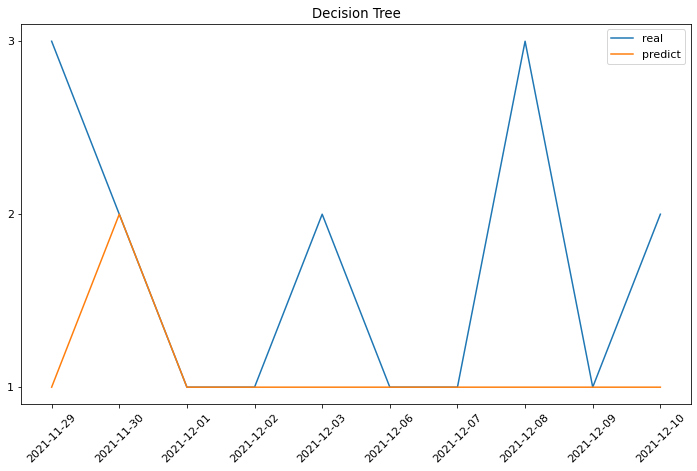

In [348]:
from sklearn.model_selection import GridSearchCV

# Decision Tree
model_dt = DecisionTreeClassifier(random_state=11)
params_dt = {'max_depth': list(range(3,24,2)),
             'min_samples_split' : [i for i in range (2,50,5)]}
grid_dt = GridSearchCV(model_dt, param_grid=params_dt, scoring='accuracy', verbose=1)
grid_dt.fit(X_train, y_train)

print(params_dt)
print(grid_dt.best_params_)
print(grid_dt.best_score_)
best_model_dt = grid_dt.best_estimator_
# print(grid_dt.best_estimator_.predict(X_test).reshape(-1,1))
print(best_model_dt.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(y_test, label='real')
plt.plot(best_model_dt.predict(X_test), label='predict')
plt.title('Decision Tree')
plt.xticks(rotation=45)
plt.yticks([1,2,3])
plt.legend()
plt.savefig('Decision_Tree_result.png')
plt.show()


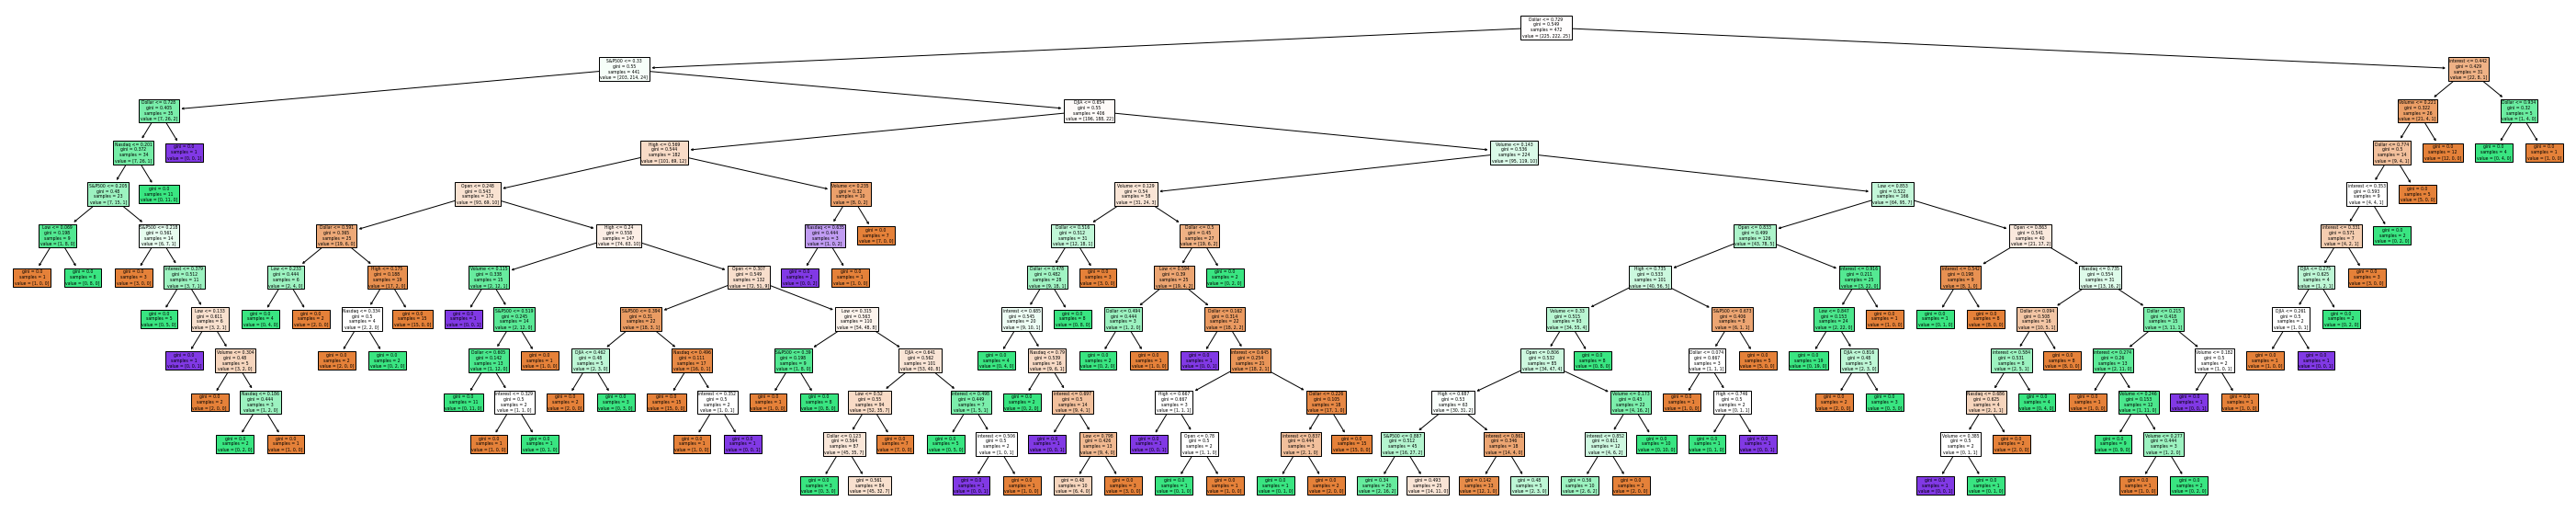

In [375]:
from sklearn.tree import plot_tree    # 시각화

plt.figure(figsize=(50,10))
plot_tree(best_model_dt, max_depth=11, filled=True, feature_names=features)
plt.savefig('best_decision_tree_plot.png')
plt.show()

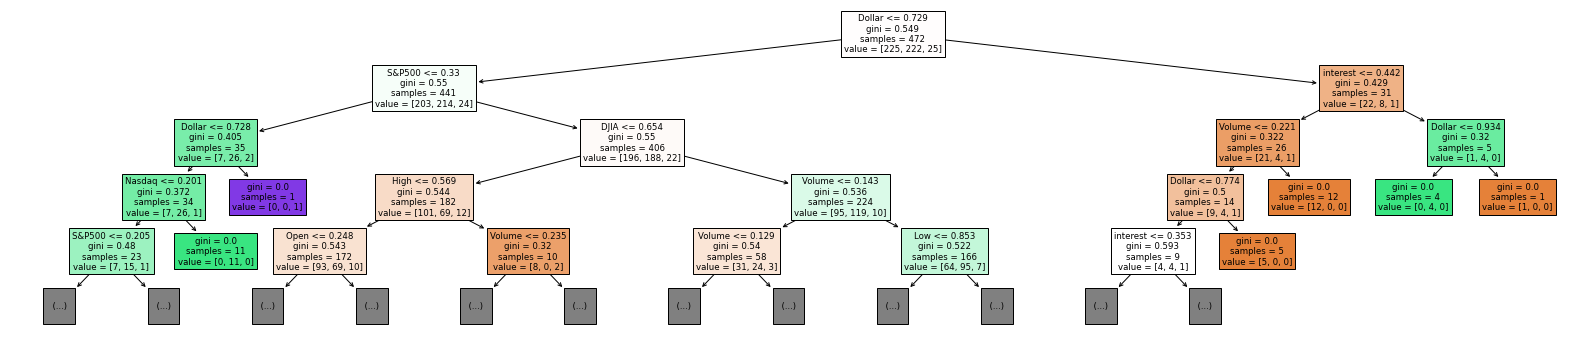

In [373]:
from sklearn.tree import plot_tree    # 시각화

plt.figure(figsize=(28,6))
plot_tree(best_model_dt, max_depth=4, filled=True, feature_names=features) # max_depth=3, 
plt.savefig('best_decision_tree_plot_2.png')
plt.show()

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
{'C': 1000}
0.5613213885778274
0.7


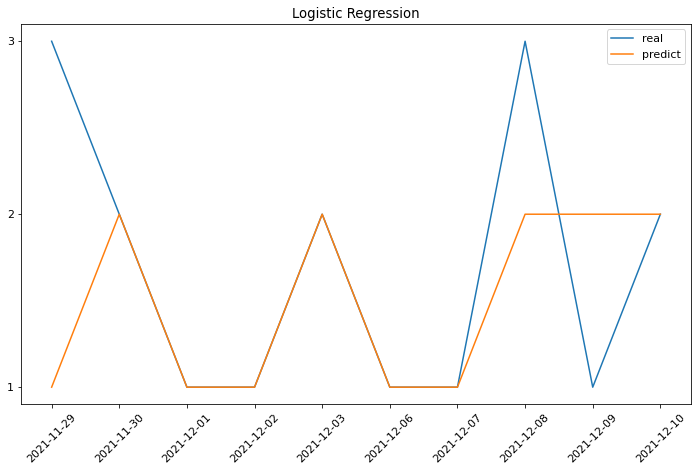

In [347]:
# Logistic Regression
# model_lgr = LogisticRegression( max_iter=1000) #solver='lbfgs',
params_lgr = {'C': [0.001,0.01,0.1,1,10,100,1000]}
grid_lgr = GridSearchCV(model_lgr, param_grid=params_lgr, scoring='accuracy', verbose=1)
grid_lgr.fit(X_train, y_train)

print(params_lgr)
print(grid_lgr.best_params_)
print(grid_lgr.best_score_)
best_model_lgr = grid_lgr.best_estimator_
# print(grid_dt.best_estimator_.predict(X_test).reshape(-1,1))
print(best_model_lgr.score(X_test, y_test))
x = y_test.index
plt.figure(figsize=(12,7))
plt.plot(x, y_test, label='real')
plt.plot(x, best_model_lgr.predict(X_test), label='predict')
plt.title('Logistic Regression')
plt.xticks(rotation=45)
plt.yticks([1,2,3])
plt.legend()
plt.savefig('Logistic_Regression_result.png')
plt.show()
